In [13]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

import matplotlib.pyplot as plt


# Load data

In [2]:
path_dataset = '../../data/graduate-admissions/Admission_Predict.csv'
df_admission = pd.read_csv(path_dataset, index_col='Serial No.')


In [3]:
X = df_admission[['GRE Score', 'CGPA']].values
y = df_admission['Chance of Admit '].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)


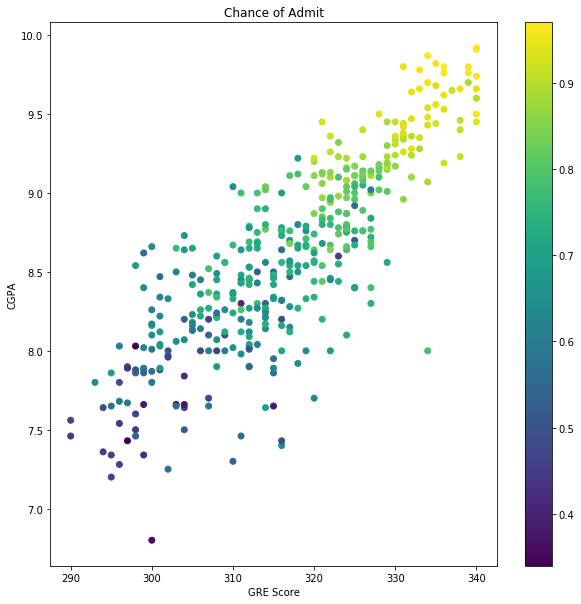

In [4]:
plt.figure(figsize=(10,10))

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.colorbar()

plt.xlabel('GRE Score')
plt.ylabel('CGPA')

plt.title('Chance of Admit')
plt.show()



# Decision tree

In [24]:
# Fit
#regr = DecisionTreeRegressor()
#regr = RandomForestRegressor()
regr = AdaBoostRegressor(base_estimator=RandomForestRegressor())
regr.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
         learning_rate=1.0, loss='linear', n_estimators=50,
         random_state=None)

In [25]:
x_pred_0, x_pred_1 = np.meshgrid(np.linspace(285, 345, num=100), np.linspace(6, 11, num=100))

In [26]:
X_pred = np.transpose([x_pred_0.ravel(), x_pred_1.ravel()])

In [27]:
# Predict
y_pred = regr.predict(X_pred).reshape(x_pred_0.shape)

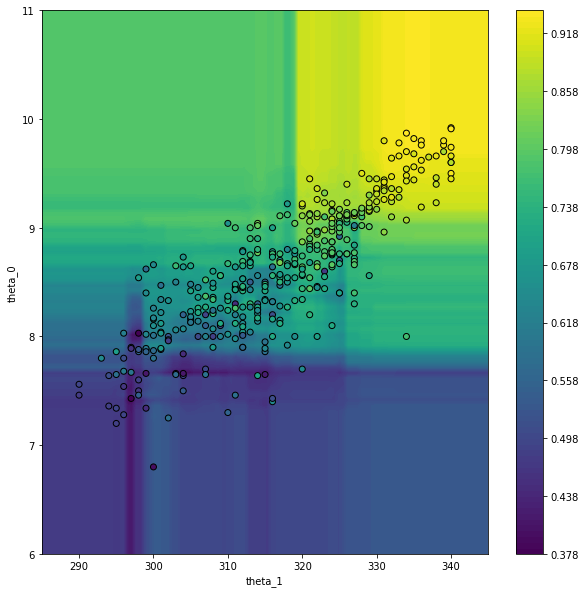

In [29]:
plt.figure(figsize=(10,10))

plt.contourf(x_pred_0, x_pred_1, y_pred, 100)
plt.colorbar()

plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="black",)

plt.xlabel('theta_1')
plt.ylabel('theta_0')

plt.show()

# Adaboost